In [14]:
!pip install pymorphy2

In [91]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import shutil
import pandas as pd

from torch.utils.data import TensorDataset, DataLoader
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download("stopwords")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /home/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
df = pd.read_csv(r"file.gz")
df.dropna(subset=['text'], inplace=True)
df

,text,count_words,stars
0,книга полна разочаровать автор позиционир себ ...,48,0
1,когд я повернуть не туд поч никта я не сказ чт...,118,0
2,претенциозна ничт как и предыдущий книга в эт ...,22,0
3,врод бы нельз воспринить эт книга буквальна но...,30,0
4,пос у книга важн и нужн отчётливый понятн что ...,126,0
...,...,...,...
1442,книга заслуживый ваш вниман и время настольк о...,119,4
1443,каз бы в книга изложа тот истина котор давна и...,40,4
1444,автор не разочаровыв к мо больша удовольство о...,33,4
1445,красивый и богатый язык тонк юмор классна перс...,126,4


In [135]:
max_words = 12000
stop_words = set(stopwords.words("russian"))

cv = CountVectorizer(max_features=max_words, stop_words=list(stop_words))
sparse_matrix = cv.fit_transform(df['text']).toarray()
sparse_matrix.shape

(1446, 12000)

In [134]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(max_words, 500)
        self.linear2 = nn.Linear(500, 100)
        self.linear3 = nn.Linear(100, 50)
        self.linear4 = nn.Linear(50, 5)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [136]:
x_train, x_temp, y_train, y_temp = train_test_split(sparse_matrix, np.array(df['stars']), train_size=0.8, random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [137]:
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()

x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

x_val = Variable(torch.from_numpy(x_val)).float()
y_val = Variable(torch.from_numpy(y_val)).long()

№0 LR: 0.001, Batch Size: 32, Epoch: 1/7, Loss (Train/Val): 1.5857/1.5475, Accuracy (Train/Val): 0.2405/0.2966
№1 LR: 0.001, Batch Size: 32, Epoch: 2/7, Loss (Train/Val): 1.0736/1.6869, Accuracy (Train/Val): 0.5571/0.3103
№2 LR: 0.001, Batch Size: 32, Epoch: 3/7, Loss (Train/Val): 0.3540/2.3699, Accuracy (Train/Val): 0.9031/0.2759
№3 LR: 0.001, Batch Size: 32, Epoch: 4/7, Loss (Train/Val): 0.0680/2.8804, Accuracy (Train/Val): 0.9931/0.2552
№4 LR: 0.001, Batch Size: 32, Epoch: 5/7, Loss (Train/Val): 0.0225/3.1410, Accuracy (Train/Val): 0.9983/0.2897
№5 LR: 0.001, Batch Size: 32, Epoch: 6/7, Loss (Train/Val): 0.0103/3.3668, Accuracy (Train/Val): 0.9991/0.2759
№6 LR: 0.001, Batch Size: 32, Epoch: 7/7, Loss (Train/Val): 0.0059/3.5005, Accuracy (Train/Val): 1.0000/0.2897


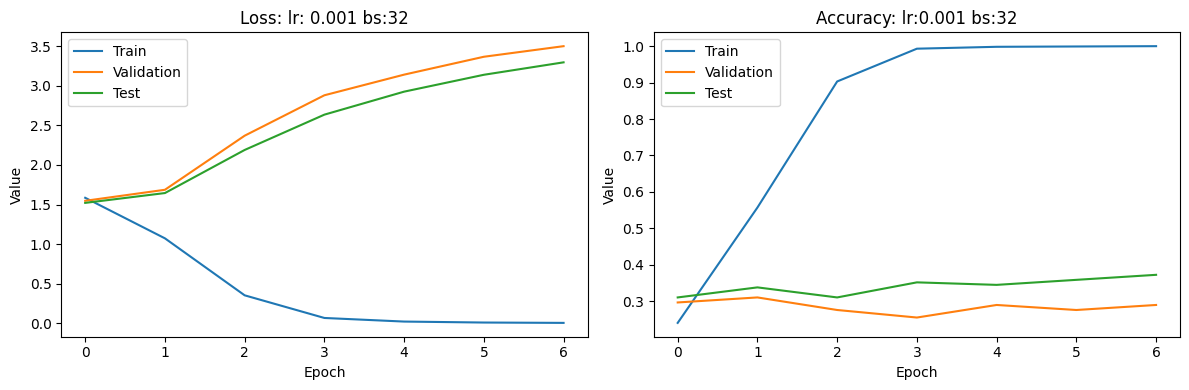

№7 LR: 0.001, Batch Size: 64, Epoch: 1/7, Loss (Train/Val): 1.6045/1.5929, Accuracy (Train/Val): 0.2275/0.2414
№8 LR: 0.001, Batch Size: 64, Epoch: 2/7, Loss (Train/Val): 1.2631/1.5574, Accuracy (Train/Val): 0.6479/0.3103
№9 LR: 0.001, Batch Size: 64, Epoch: 3/7, Loss (Train/Val): 0.5091/1.9736, Accuracy (Train/Val): 0.8806/0.2966
№10 LR: 0.001, Batch Size: 64, Epoch: 4/7, Loss (Train/Val): 0.1199/2.6590, Accuracy (Train/Val): 0.9784/0.2897
№11 LR: 0.001, Batch Size: 64, Epoch: 5/7, Loss (Train/Val): 0.0374/2.7764, Accuracy (Train/Val): 0.9974/0.2552
№12 LR: 0.001, Batch Size: 64, Epoch: 6/7, Loss (Train/Val): 0.0170/3.0673, Accuracy (Train/Val): 0.9991/0.2690
№13 LR: 0.001, Batch Size: 64, Epoch: 7/7, Loss (Train/Val): 0.0100/3.1558, Accuracy (Train/Val): 1.0000/0.2759


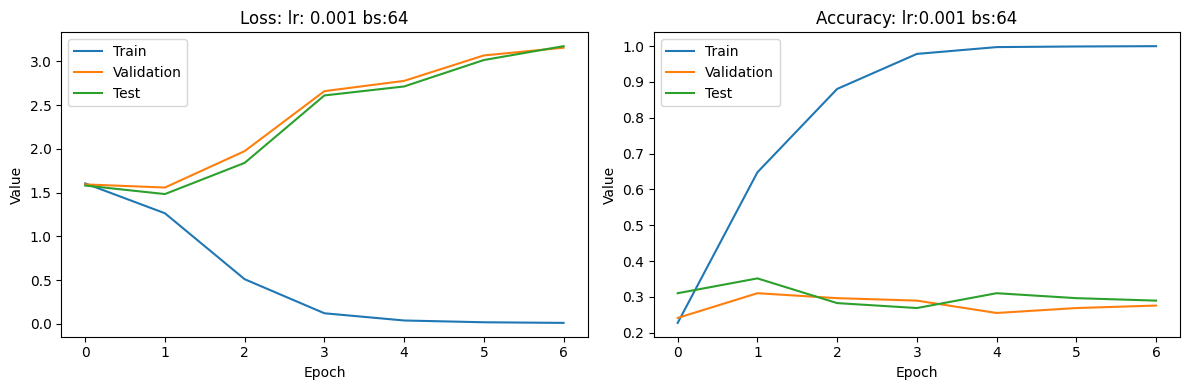

№14 LR: 0.001, Batch Size: 128, Epoch: 1/7, Loss (Train/Val): 1.6078/1.6043, Accuracy (Train/Val): 0.2310/0.2069
№15 LR: 0.001, Batch Size: 128, Epoch: 2/7, Loss (Train/Val): 1.5231/1.5509, Accuracy (Train/Val): 0.5337/0.3241
№16 LR: 0.001, Batch Size: 128, Epoch: 3/7, Loss (Train/Val): 1.1667/1.5038, Accuracy (Train/Val): 0.7240/0.2897
№17 LR: 0.001, Batch Size: 128, Epoch: 4/7, Loss (Train/Val): 0.5870/1.5623, Accuracy (Train/Val): 0.8400/0.2483
№18 LR: 0.001, Batch Size: 128, Epoch: 5/7, Loss (Train/Val): 0.1974/1.8942, Accuracy (Train/Val): 0.9870/0.2759
№19 LR: 0.001, Batch Size: 128, Epoch: 6/7, Loss (Train/Val): 0.0710/2.9471, Accuracy (Train/Val): 0.9948/0.2345
№20 LR: 0.001, Batch Size: 128, Epoch: 7/7, Loss (Train/Val): 0.0293/2.5976, Accuracy (Train/Val): 0.9991/0.2897


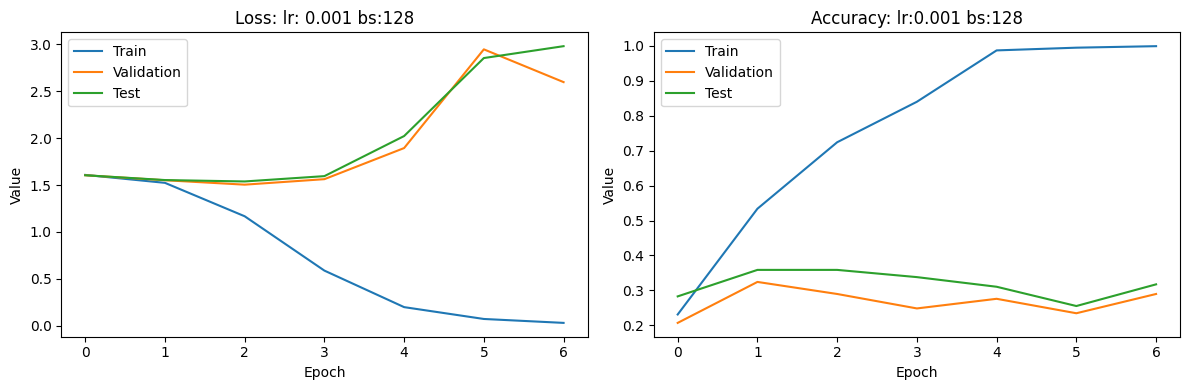

№21 LR: 0.01, Batch Size: 32, Epoch: 1/7, Loss (Train/Val): 1.5438/1.5099, Accuracy (Train/Val): 0.2716/0.2966
№22 LR: 0.01, Batch Size: 32, Epoch: 2/7, Loss (Train/Val): 1.0437/1.9577, Accuracy (Train/Val): 0.5467/0.2552
№23 LR: 0.01, Batch Size: 32, Epoch: 3/7, Loss (Train/Val): 0.4299/2.8296, Accuracy (Train/Val): 0.8495/0.2483
№24 LR: 0.01, Batch Size: 32, Epoch: 4/7, Loss (Train/Val): 0.1365/3.0378, Accuracy (Train/Val): 0.9619/0.2552
№25 LR: 0.01, Batch Size: 32, Epoch: 5/7, Loss (Train/Val): 0.0271/3.2916, Accuracy (Train/Val): 0.9905/0.2759
№26 LR: 0.01, Batch Size: 32, Epoch: 6/7, Loss (Train/Val): 0.0168/4.3851, Accuracy (Train/Val): 0.9974/0.2690
№27 LR: 0.01, Batch Size: 32, Epoch: 7/7, Loss (Train/Val): 0.0033/8.8351, Accuracy (Train/Val): 0.9991/0.2621


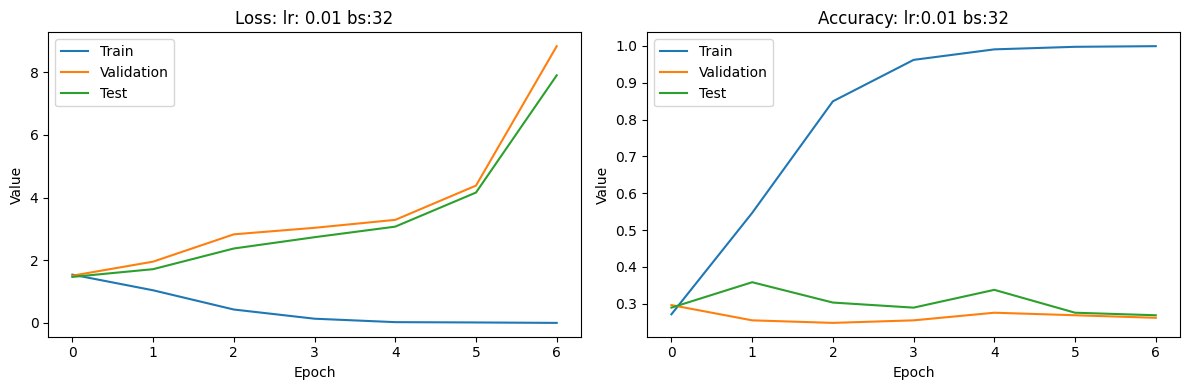

№28 LR: 0.01, Batch Size: 64, Epoch: 1/7, Loss (Train/Val): 1.5394/1.4525, Accuracy (Train/Val): 0.2647/0.3448
№29 LR: 0.01, Batch Size: 64, Epoch: 2/7, Loss (Train/Val): 0.8171/2.3659, Accuracy (Train/Val): 0.6393/0.2897
№30 LR: 0.01, Batch Size: 64, Epoch: 3/7, Loss (Train/Val): 0.2699/3.2135, Accuracy (Train/Val): 0.9083/0.2828
№31 LR: 0.01, Batch Size: 64, Epoch: 4/7, Loss (Train/Val): 0.0731/3.6959, Accuracy (Train/Val): 0.9758/0.2759
№32 LR: 0.01, Batch Size: 64, Epoch: 5/7, Loss (Train/Val): 0.0225/4.2015, Accuracy (Train/Val): 0.9939/0.2207
№33 LR: 0.01, Batch Size: 64, Epoch: 6/7, Loss (Train/Val): 0.0144/4.3738, Accuracy (Train/Val): 0.9957/0.2552
№34 LR: 0.01, Batch Size: 64, Epoch: 7/7, Loss (Train/Val): 0.0026/4.4415, Accuracy (Train/Val): 1.0000/0.2345


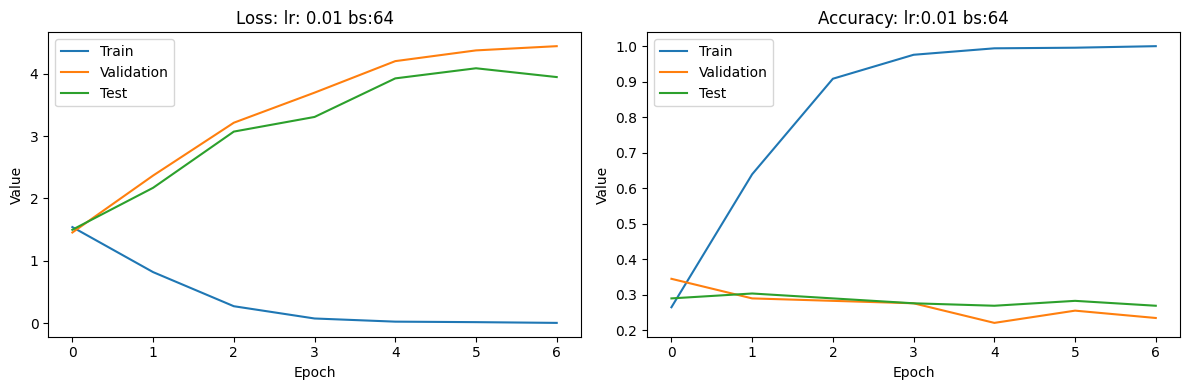

№35 LR: 0.01, Batch Size: 128, Epoch: 1/7, Loss (Train/Val): 1.5865/1.6009, Accuracy (Train/Val): 0.2561/0.2552
№36 LR: 0.01, Batch Size: 128, Epoch: 2/7, Loss (Train/Val): 0.7195/2.7526, Accuracy (Train/Val): 0.6920/0.2621
№37 LR: 0.01, Batch Size: 128, Epoch: 3/7, Loss (Train/Val): 0.2307/3.4163, Accuracy (Train/Val): 0.9161/0.2552
№38 LR: 0.01, Batch Size: 128, Epoch: 4/7, Loss (Train/Val): 0.0490/3.6327, Accuracy (Train/Val): 0.9836/0.2690
№39 LR: 0.01, Batch Size: 128, Epoch: 5/7, Loss (Train/Val): 0.0309/5.2379, Accuracy (Train/Val): 0.9896/0.2345
№40 LR: 0.01, Batch Size: 128, Epoch: 6/7, Loss (Train/Val): 0.0109/4.5061, Accuracy (Train/Val): 0.9983/0.3172
№41 LR: 0.01, Batch Size: 128, Epoch: 7/7, Loss (Train/Val): 0.0122/4.5809, Accuracy (Train/Val): 0.9991/0.2966


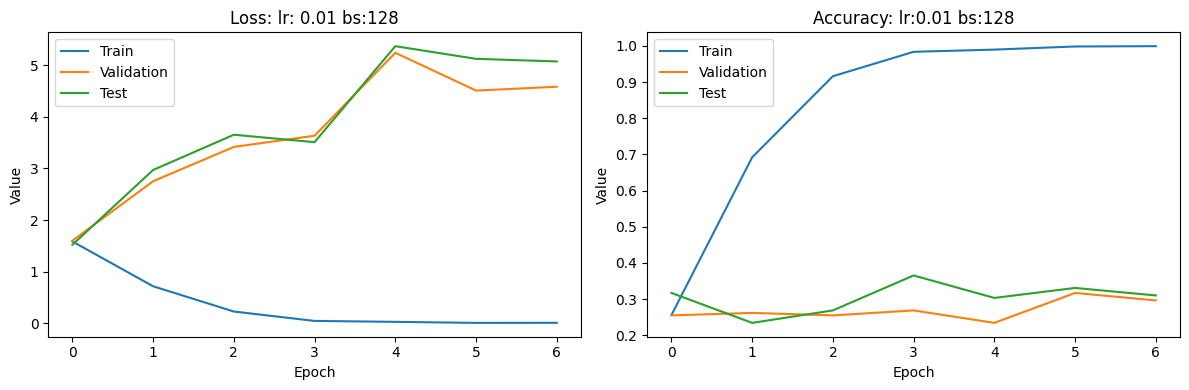

№42 LR: 0.1, Batch Size: 32, Epoch: 1/7, Loss (Train/Val): 4.2391/1.6244, Accuracy (Train/Val): 0.2033/0.1862
№43 LR: 0.1, Batch Size: 32, Epoch: 2/7, Loss (Train/Val): 2.6268/1.6086, Accuracy (Train/Val): 0.2016/0.2000
№44 LR: 0.1, Batch Size: 32, Epoch: 3/7, Loss (Train/Val): 1.6134/1.6072, Accuracy (Train/Val): 0.1981/0.2138
№45 LR: 0.1, Batch Size: 32, Epoch: 4/7, Loss (Train/Val): 1.6168/1.6109, Accuracy (Train/Val): 0.2059/0.2345
№46 LR: 0.1, Batch Size: 32, Epoch: 5/7, Loss (Train/Val): 1.6152/1.6194, Accuracy (Train/Val): 0.1946/0.1793
№47 LR: 0.1, Batch Size: 32, Epoch: 6/7, Loss (Train/Val): 1.6121/1.6072, Accuracy (Train/Val): 0.1998/0.2345
№48 LR: 0.1, Batch Size: 32, Epoch: 7/7, Loss (Train/Val): 1.6224/1.6210, Accuracy (Train/Val): 0.1955/0.1793


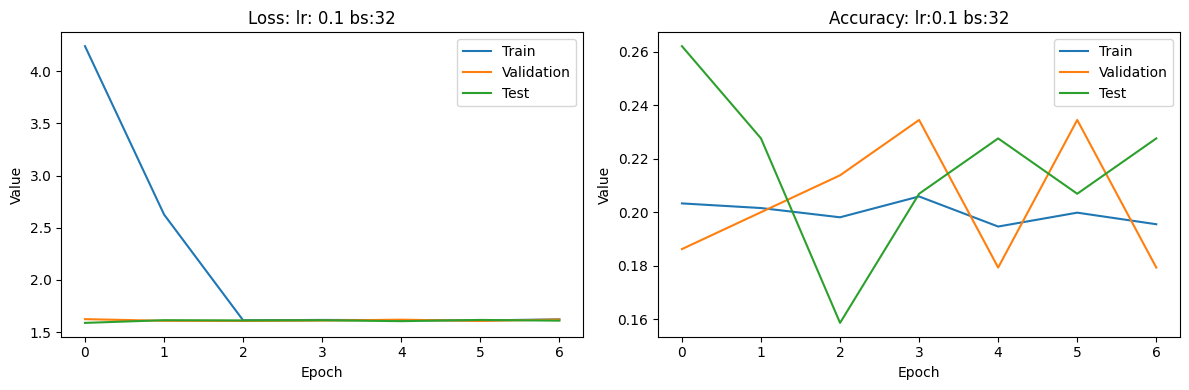

№49 LR: 0.1, Batch Size: 64, Epoch: 1/7, Loss (Train/Val): 10.0908/1.6869, Accuracy (Train/Val): 0.1851/0.2276
№50 LR: 0.1, Batch Size: 64, Epoch: 2/7, Loss (Train/Val): 3.6427/1.6180, Accuracy (Train/Val): 0.2050/0.1793
№51 LR: 0.1, Batch Size: 64, Epoch: 3/7, Loss (Train/Val): 2.5343/1.6163, Accuracy (Train/Val): 0.2128/0.1793
№52 LR: 0.1, Batch Size: 64, Epoch: 4/7, Loss (Train/Val): 1.6197/1.6172, Accuracy (Train/Val): 0.2171/0.1793
№53 LR: 0.1, Batch Size: 64, Epoch: 5/7, Loss (Train/Val): 1.6608/1.6114, Accuracy (Train/Val): 0.2197/0.2138
№54 LR: 0.1, Batch Size: 64, Epoch: 6/7, Loss (Train/Val): 1.7445/1.6142, Accuracy (Train/Val): 0.2085/0.2000
№55 LR: 0.1, Batch Size: 64, Epoch: 7/7, Loss (Train/Val): 1.5950/1.6118, Accuracy (Train/Val): 0.2180/0.2000


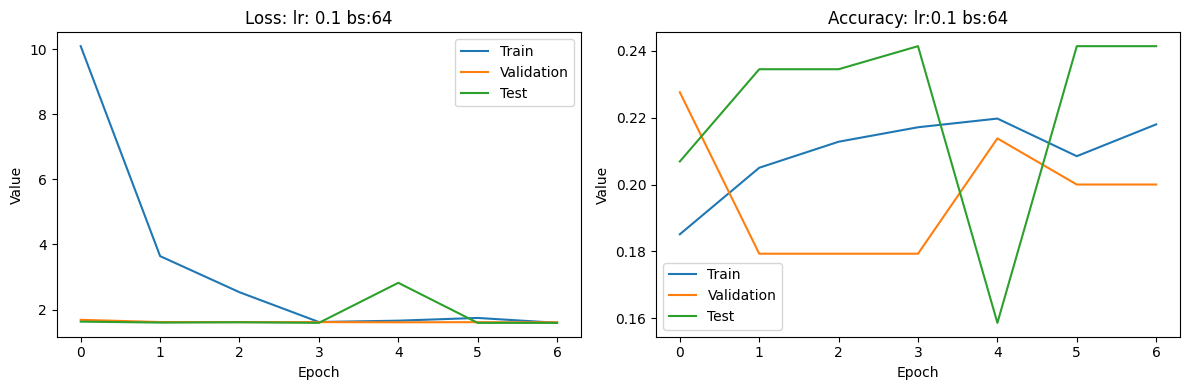

№56 LR: 0.1, Batch Size: 128, Epoch: 1/7, Loss (Train/Val): 17.7456/1.7606, Accuracy (Train/Val): 0.2076/0.2138
№57 LR: 0.1, Batch Size: 128, Epoch: 2/7, Loss (Train/Val): 2.2445/1.6188, Accuracy (Train/Val): 0.2197/0.2000
№58 LR: 0.1, Batch Size: 128, Epoch: 3/7, Loss (Train/Val): 1.7374/1.6235, Accuracy (Train/Val): 0.2344/0.2000
№59 LR: 0.1, Batch Size: 128, Epoch: 4/7, Loss (Train/Val): 1.6005/1.6305, Accuracy (Train/Val): 0.2284/0.1793
№60 LR: 0.1, Batch Size: 128, Epoch: 5/7, Loss (Train/Val): 1.5754/1.9979, Accuracy (Train/Val): 0.2292/0.1931
№61 LR: 0.1, Batch Size: 128, Epoch: 6/7, Loss (Train/Val): 1.6089/1.6193, Accuracy (Train/Val): 0.2085/0.2000
№62 LR: 0.1, Batch Size: 128, Epoch: 7/7, Loss (Train/Val): 1.8062/1.6101, Accuracy (Train/Val): 0.2249/0.2000


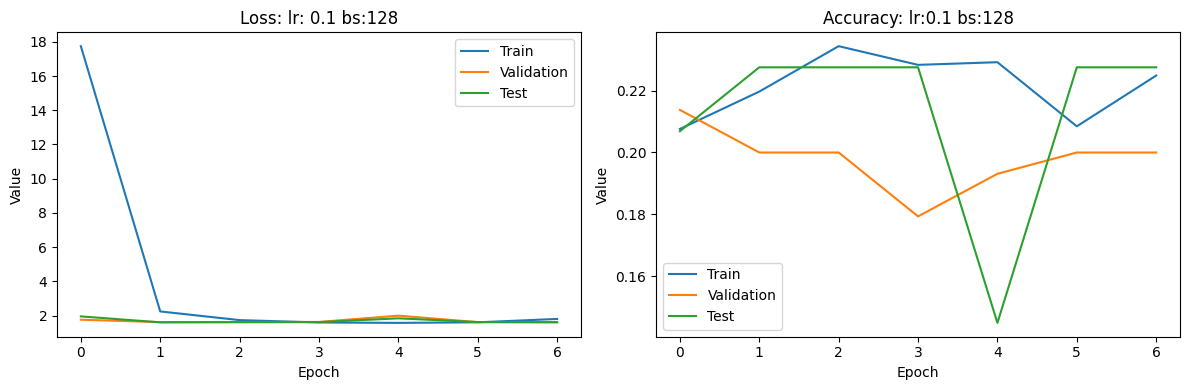

In [138]:
index = 0
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
criterion = nn.CrossEntropyLoss()

models_base = "models_base"
current_path = os.getcwd()

if not os.path.exists(models_base):
    os.mkdir(models_base)

else:
    shutil.rmtree(models_base)
    os.mkdir(models_base)


model_list = []
epochs = 7

for lr in learning_rates:
    for batch_size in batch_sizes:
        # Переопределение оптимизатора с новыми параметрами
        model = SimpleModel()
        optimizer = torch.optim.Adam(params=model.parameters() , lr=lr)

        # Инициализация даталоадеров с новым batch_size
        train_loader = torch.utils.data.DataLoader(list(zip(x_train, y_train)), batch_size=batch_size, shuffle=True)

        test_loader = torch.utils.data.DataLoader(list(zip(x_test, y_test)), batch_size=batch_size, shuffle=False)

        val_loader = torch.utils.data.DataLoader(list(zip(x_val, y_val)), batch_size=batch_size, shuffle=False)

        # Обновление переменных
        model.train()
        loss_values_train = []
        acc_values_train = []
        loss_values_val = []
        acc_values_val = []
        loss_values_test = []
        acc_values_test = []

        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            correct_train = 0

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                correct_train += (predicted == labels).sum().item()

            # Вычисление метрик для обучающей выборки
            average_loss_train = running_loss / len(train_loader)
            accuracy_train = correct_train / len(x_train)
            loss_values_train.append(average_loss_train)
            acc_values_train.append(accuracy_train)

            model_list.append(model)

            # Валидация модели
            model.eval()
            running_loss_val = 0.0
            correct_val = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    outputs = model(inputs)
                    loss_val = criterion(outputs, labels)
                    running_loss_val += loss_val.item()
                    _, predicted_val = torch.max(outputs.data, 1)
                    correct_val += (predicted_val == labels).sum().item()

            # Вычисление метрик для валидационной выборки
            average_loss_val = running_loss_val / len(val_loader)
            accuracy_val = correct_val / len(x_val)
            loss_values_val.append(average_loss_val)
            acc_values_val.append(accuracy_val)


            # Тест модели
            running_loss_test = 0.0
            correct_test = 0

            with torch.no_grad():
                for inputs, labels in test_loader:
                    outputs = model(inputs)
                    loss_test = criterion(outputs, labels)
                    running_loss_test += loss_test.item()
                    _, predicted_test = torch.max(outputs.data, 1)
                    correct_test += (predicted_test == labels).sum().item()

            # Вычисление метрик для тестовой выборки
            average_loss_test = running_loss_test / len(test_loader)
            accuracy_test = correct_test / len(x_test)
            loss_values_test.append(average_loss_test)
            acc_values_test.append(accuracy_test)


            # Вывод результатов каждую эпоху
            print('№{} LR: {}, Batch Size: {}, Epoch: {}/{}, Loss (Train/Val): {:.4f}/{:.4f}, Accuracy (Train/Val): {:.4f}/{:.4f}'.format(
                index, lr, batch_size, epoch + 1, epochs, average_loss_train, average_loss_val, accuracy_train, accuracy_val))
            index += 1
            model_list.append(model)
            # torch.save(model.state_dict(),os.path.join(models_base, f'model_{index}_lr_{lr}_bs_{batch_size}_epoch_{epoch + 1}.pth'))

        # Построение графиков
        plt.figure(figsize=(12, 4))

        # График функции потерь
        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_values_train, label='Train')
        plt.plot(range(epochs), loss_values_val, label='Validation')
        plt.plot(range(epochs), loss_values_test, label='Test')
        plt.title(f'Loss: lr: {lr} bs:{batch_size}')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.legend()

        # График метрики качества
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_values_train, label='Train')
        plt.plot(range(epochs), acc_values_val, label='Validation')
        plt.plot(range(epochs), acc_values_test, label='Test')
        plt.title(f'Accuracy: lr:{lr} bs:{batch_size}')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Посмотрим работоспособность модели на отзывах из livelib не в выборке

In [140]:
remove_non_alphabets =lambda x: re.sub(r'[^а-яА-Я]',' ',x)

tokenize = lambda x: word_tokenize(x)

ps = SnowballStemmer("russian")
stem = lambda w: [ ps.stem(x) for x in w ]

morph = MorphAnalyzer()
leammtizer = lambda w: [ morph.parse(x)[0].normal_form for x in w ]

stop_words = set(stopwords.words("russian"))

In [141]:
index = 28

In [185]:
new_reviews = [
"""Ну ладно, надо что-то рассказать же, чтобы увлечь. Сначала расскажу как я её читала. Схватила наобум, динамичное происходящее сразу увлекло, прочитала быстро, осталась очень довольна. Ничего подобного до этого не читала вот в каком плане - это производственный роман. Раскрывает не только героев, но и "кухню" изнутри. А "кухня" раскрывается в зависимости от названия романа. К бабке-гадалке не ходи - в данном произведении мы видим (во всех подробностях!) "внутренности" огромного отеля. Оказывается, это захватывает не хуже триллера. Ты и книгу читаешь, развлекаешь себя фабулой, и параллельно узнаешь тонкости и особенности гостиничного бизнеса (взаправдушные!
""",
""" Это худшее, что я когда-либо пыталась читать Господа, поздравьте меня, я наконец-то нашла худшую книгу и буду обсирать её с чистой совестью. Обычно, как бы не нравилась мне книга, я пишу, что всё равно любая имеет право на существование. Прости меня автор, к этой книге это утверждение не относится. Ей можно было бы и не существовать. Просто незачем. Ноль причин на существование. И не за порносцены (которые там есть), и не за пахабщину, которую уверяют другие недовольные, там есть. Я читаю и мерзкие и пахабные книги. Тут дело вообще - труба! На что похожа книга? На серую склизкую субстанцию непонятной природы. Пусто, не интересно, бессюжетно, бессмысленно и далее по списку с приставкой без/с-.
""",
"""Книгу можно описать двумя фразами 1) Все к лучшему в этом лучшем из миров 2) Pain is inevitable, suffering is optional Про дзен разговоров в книге крайне мало. А чего много, так это попыток натянуть сову на глобус: рассказать, что сознание (эмоции, установки, принципы) определяет наше бытие, и сделать это наукообразно (через одно место), по возможности подкрепив это какими-то мутными примерами и подключив несчастный дзен как интегрирующее начало
"""]

df_2 = pd.DataFrame()

df_2["text"] = new_reviews
df_2["label"] = [5, 1, 2]
df_2


,text,label
0,"Ну ладно, надо что-то рассказать же, чтобы увл...",5
1,"Это худшее, что я когда-либо пыталась читать ...",1
2,Книгу можно описать двумя фразами 1) Все к луч...,2


In [186]:
print('Processing : [=', end='')
df_2['text'] = df_2['text'].apply(remove_non_alphabets)
print('=', end='')
df_2['text'] = df_2['text'].apply(tokenize) # [ word_tokenize(row) for row in df['text']]
print('=', end='')
df_2['text'] = df_2['text'].apply(stem)
print('=', end='')
df_2['text'] = df_2['text'].apply(leammtizer)
print('=', end='')
df_2['text'] = df_2['text'].apply(lambda x: ' '.join(x))
print('] : Completed', end='')

df_2.dropna(subset=['text'], inplace=True)

Processing : [=====] : Completed

In [187]:
df_2

,text,label
0,ну ладна над что то рассказ же чтоб увлечий сн...,5
1,эт худш что я когд либ пыт чита господин поздр...,1
2,книга можн описа два фраза всё к лучш в эт луч...,2


In [188]:
new_vectorize = cv.transform(df_2['text']).toarray()
new_review_tensor = torch.from_numpy(new_vectorize).float()
new_vectorize.shape

(3, 12000)

In [189]:
model_list[index].eval()
with torch.no_grad():
    output = model_list[index](new_review_tensor)
    _, predicted_labels = torch.max(output, 1)

# Вывод предсказанных меток для всех новых отзывов
predicted_labels_list = predicted_labels.numpy() + 1
print("Предсказанные метки для новых отзывов:", predicted_labels_list)

Предсказанные метки для новых отзывов: [5 2 1]


In [190]:
df_2["predicted"] = predicted_labels_list

In [191]:
df_2

,text,label,predicted
0,ну ладна над что то рассказ же чтоб увлечий сн...,5,5
1,эт худш что я когд либ пыт чита господин поздр...,1,2
2,книга можн описа два фраза всё к лучш в эт луч...,2,1


In [192]:
torch.save(model_list[index].state_dict(), os.path.join("models_base", f'model_{index}.pth'))

# Выгрузить модель


In [158]:
model_state = torch.load(f"models_base/model_{index}.pth")

In [193]:
new_reviews = [
"""Это уютная книга, с которой приятно провести вечер. Каждая страница наполняет тебя теплом и надеждой, что все будет хорошо. Ты как будто попадаешь в объятия к любимому человеку после долгой разлуки. Садишься с ним за чашечкой кофе, за окном метель, а ты рассказываешь о всех невзгодах, после чего становится так легко. Словно вся тревога за пережитое время улетучилась, а остается настоящее с мечтами и силами их исполнить. Книга помогает высказаться, не говоря и слова. Вот чем стала для меня эта история.
""",
"""Вторая часть трилогии знакомит читателя с семейной жизнью Кристин. Она теперь хозяйка большого поместья, где работы непочатый край. Помимо поместья у Кристин куча мала детей, а у любимого мужа новый интерес - политика. Кристин никак не может простить себе грехи своей молодости, а тут еще и муженёк подбрасывает ложку дегтя в их семейную жизнь, а потом и вовсе попадает в большую беду. — Вторая книга мне понравилась чуть меньше первой, так как здесь появляется большое количество персонажей, чьи имена запомнить не представляется возможным. Автор углубляется в стенания героини о грехах молодости и в религию, потом перескакивает на политику, но сведения настолько разбросаны, что без Гугла не разобраться. А об очередном пополнении в семействе Кристин, Унсет упоминает лишь вскользь
""",
"""Молодой, амбициозный, но бедный сын плотника, Жюльен Сорель мечтает стать священником. Но так как денег на учебу нет, то он принимает предложение стать учителем латыни у детей мэра. Жюльен начинает завоевывать уважение, но тут вмешивается любовь, которая запустит колесо неудач в его жизни. Жюльену уготована активная, насыщенная жизнь со взлетами и падениями, с любовными страстями и потерями. Один скажет, что Жюльен наглый и самоуверенный человек, другой пожалеет его, сказав, что он потерял голову от любви. Проза Стендаля тягучая и детальная, герои раскрыты таким образом, что сам читатель решает, положительный ли тот или иной персонаж, или отрицательный. Автор интересно смешивает темы в своем произведении: политику и религию, верность и прелюбодеяние, богатство и бедность, любовь и ненависть.
""",
""" Это худшее, что я когда-либо пыталась читать Господа, поздравьте меня, я наконец-то нашла худшую книгу и буду обсирать её с чистой совестью. Обычно, как бы не нравилась мне книга, я пишу, что всё равно любая имеет право на существование. Прости меня автор, к этой книге это утверждение не относится. Ей можно было бы и не существовать. Просто незачем. Ноль причин на существование. И не за порносцены (которые там есть), и не за пахабщину, которую уверяют другие недовольные, там есть. Я читаю и мерзкие и пахабные книги. Тут дело вообще - труба!
"""]

df_2 = pd.DataFrame()

df_2["text"] = new_reviews
df_2["label"] = [5, 4, 3, 1]
df_2

,text,label
0,"Это уютная книга, с которой приятно провести в...",5
1,Вторая часть трилогии знакомит читателя с семе...,4
2,"Молодой, амбициозный, но бедный сын плотника, ...",3
3,"Это худшее, что я когда-либо пыталась читать ...",1


In [194]:
print('Processing : [=', end='')
df_2['text'] = df_2['text'].apply(remove_non_alphabets)
print('=', end='')
df_2['text'] = df_2['text'].apply(tokenize) # [ word_tokenize(row) for row in df['text']]
print('=', end='')
df_2['text'] = df_2['text'].apply(stem)
print('=', end='')
df_2['text'] = df_2['text'].apply(leammtizer)
print('=', end='')
df_2['text'] = df_2['text'].apply(lambda x: ' '.join(x))
print('] : Completed', end='')

df_2.dropna(subset=['text'], inplace=True)

Processing : [=====] : Completed

In [195]:
new_vectorize = cv.transform(df_2['text']).toarray()
new_review_tensor = torch.from_numpy(new_vectorize).float()
new_vectorize.shape

(4, 12000)

In [196]:
model = SimpleModel()

# Загрузка весов
model.load_state_dict(model_state)

<All keys matched successfully>

In [197]:
model.eval()
with torch.no_grad():
    output = model(new_review_tensor)
    _, predicted_labels = torch.max(output, 1)

# Вывод предсказанных меток для всех новых отзывов
predicted_labels_list = predicted_labels.numpy() + 1
print("Предсказанные метки для новых отзывов:", predicted_labels_list)

Предсказанные метки для новых отзывов: [5 4 5 2]


In [198]:
df_2["predicted"] = predicted_labels_list

In [199]:
df_2

,text,label,predicted
0,эт уютн книга с котор приятн провест вечер каж...,5,5
1,втора частый трилог знак читатело с семейн жиз...,4,4
2,молодой амбициозна но бедна сын плотник жюл со...,3,5
3,эт худш что я когд либ пыт чита господин поздр...,1,2
